<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/Python-Notebook-Banners/Exercise.png"  style="display: block; margin-left: auto; margin-right: auto;";/>
</div>

# Exercise: Binary classification metrics
© ExploreAI Academy

In this exercise, we train a logistic regression model and evaluate its performance by calculating overall accuracy from its confusion matrix.

## Learning objectives

By the end of this train, you should be able to:
* Train a logistic regression model.
* Calculate the model's overall accuracy.

## Import libraries and dataset

In an effort to conserve a particular endangered animal species, we want to be able to predict the suitability of various habitats. We have a dataset, `habitat_suitability`, that contains various environmental and ecological features used to determine whether or not a habitat is suitable for the species.

In [34]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
# Load dataset
habitat_df= pd.read_csv("https://raw.githubusercontent.com/Explore-AI/Public-Data/master/habitat_suitability.csv")
habitat_df.head(5)

,Average Temperature (°C),Annual Rainfall (mm),Vegetation Density (% coverage),Predator Presence (0 or 1),Human Disturbance Index,Altitude (meters),Water Source Availability (0 or 1),Habitat Suitability
0,20.009527,1270.407873,90.142754,1,0.392750,355.433041,1,1
1,16.228576,1419.881504,58.246594,0,0.356556,64.890245,1,1
2,25.472638,991.750374,57.898060,1,0.832856,301.426259,1,0
3,34.030446,1431.824231,41.892067,1,0.044347,390.152269,1,0
4,38.334526,1018.262946,56.814597,1,0.308421,450.584113,1,0


## Exercises

Using the dataset, we want to build a classification model that will be able to classify habitats as suitable (1) or unsuitable (0).

In the code below, we prepare the dataset and train a logistic regression model following these preliminary steps.

In [7]:
# Prepare the data
X = habitat_df.drop('Habitat Suitability', axis=1)  # Features
y = habitat_df['Habitat Suitability']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

### Exercise 1

**a)** 

Now that we have trained a logistic regression model on the `habitat_suitability` dataset, let's try and get information on how our model performs on new unseen data.

Hence: 

1. Use the trained logistic regression model to make predictions on the test set.
2. Import and use `confusion_matrix` from `sklearn.metrics` to generate the confusion matrix for your predictions.
3. Display the confusion matrix.

**Note:** Remember to scale the test set features to ensure consistency.

In [18]:
# Your solution here...

import warnings
warnings.filterwarnings("ignore")

lm_pred = model.predict(X_test)

In [60]:
from sklearn.metrics import confusion_matrix 
confusion_matrix(y_test, lm_pred)

array([[145,   7],
       [ 39,   9]], dtype=int64)

,1: Suitable,0: Not Suitable
1: Suitable,145,7
0: Not Suitable,39,9


**b)** 

The confusion matrix is not easy to read. Let's improve on this by converting it into a DataFrame with the following row and column labels `0: Unsuitable` and `1: Suitable`. 

In [62]:
# Your solution here...

labels = ['0: Not Suitable', '1: Suitable']

pd.DataFrame(data=confusion_matrix(y_test, lm_pred), index=labels, columns=labels)

,0: Not Suitable,1: Suitable
0: Not Suitable,145,7
1: Suitable,39,9


### Exercise 2

Now that we can easily interpret our confusion matrix, we want to compare the distribution of the ground truth classifications and the classifications made by the model. 

That is, we want to find out how many observations were classified as suitable (1) and unsuitable (0) habitats by the model and compare this to the counts originally in the test set.


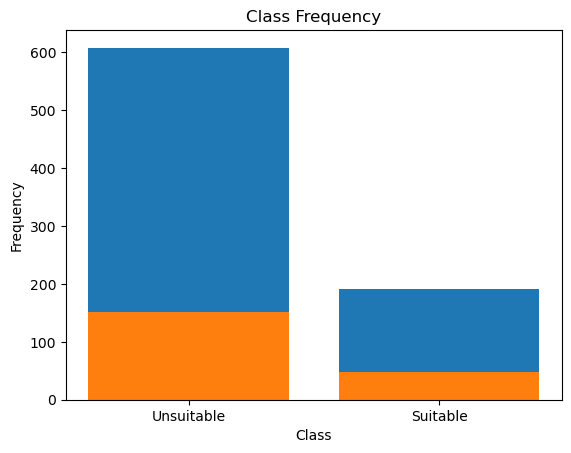

Habitat Suitability
0    760
1    240
Name: count, dtype: int64

In [42]:
# Your solution here...

unique, counts = np.unique(y_train, return_counts=True)
plt.bar(unique, counts)
unique, counts = np.unique(y_test, return_counts=True)
plt.bar(unique, counts)

plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(ticks=[0,1], labels=['Unsuitable','Suitable'])

plt.show()
y.value_counts()

### Exercise 3

From the multidimensional array `conf_matrix`, access the true positive, true negative, false positive, and false negative values and store them in the following variables `TP`, `TN`, `FP`, and `FN`, respectively. 

Print each value together with its label.

**Hint:** Apply your knowledge of where each of these values is located in the confusion matrix.

In [86]:
# Your solution here...
conf_matrix = confusion_matrix(y_test, lm_pred)
TP, FN, FP, TN = conf_matrix[0,0], conf_matrix[0,1], conf_matrix[1,0], conf_matrix[1,1]

print(f'TP : {TP} \nFN : {FN} \nFP : {FP} \nTN : {TN}')

TypeError: 'function' object is not subscriptable

### Exercise 4

Let's now find out the overall accuracy of our model. 

**a)** Using the values from **Exercise 3**, calculate the overall accuracy using the formula: 
 
 $$Accuracy =  \frac{Correct\space predictions}{Total\space predictions}$$

**b)** Comment on the suitability of using accuracy as the sole metric for evaluating the performance of our model.

In [74]:
# Your solution here...

accuracy = (TP + TN) / (TP + TN + FP + FN)
accuracy

0.77

## Solutions

### Exercise 1

**a)** 

In [76]:
# Import the confusion_matrix function from sklearn's metrics module
from sklearn.metrics import confusion_matrix

# Scale the test dataset features using the same scaler that was applied to the training dataset
X_test_scaled = scaler.transform(X_test)

# Use the trained logistic regression model to predict the outcomes for the scaled test dataset.
y_pred = model.predict(X_test_scaled)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[143   9]
 [ 16  32]]


We use the `confusion_matrix` function from `sklearn` to compare
the model's predicted values against the actual values from the test dataset.

It displays the correct and incorrect predictions across the different classes. 

**b)** 

In [80]:
# Define the labels for the confusion matrix
labels = ['0: Unsuitable ', '1: Suitable']

# Create a Pandas DataFrame from the confusion matrix data and the labels defined above
matrix_df = pd.DataFrame(data=conf_matrix, index=labels, columns=labels)

# Display the resulting DataFrame
matrix_df

,0: Unsuitable,1: Suitable
0: Unsuitable,143,9
1: Suitable,16,32


We create a Pandas DataFrame to neatly display our previously generated confusion matrix by labelling the rows and columns according to the outcomes they represent. 

### Exercise 2

In [82]:
# Sum of each row: Ground truth totals for each class
ground_truth_totals = matrix_df.sum(axis=1)
print("Ground Truth Totals for Each Class:")
print(ground_truth_totals)

# Sum of each column: Totals for the predictions for each class
prediction_totals = matrix_df.sum(axis=0)
print("\nPrediction Totals for Each Class:")
print(prediction_totals)

Ground Truth Totals for Each Class:
0: Unsuitable     152
1: Suitable        48
dtype: int64

Prediction Totals for Each Class:
0: Unsuitable     159
1: Suitable        41
dtype: int64


We calculate the ground truth totals for each class by summing up the rows of the confusion matrix DataFrame. 

On the other hand, we calculate the totals for the predictions for each class by summing up the columns of the confusion matrix DataFrame.

Analysing the ground truth totals can help us to understand the class balance or imbalance inherent in the dataset, while examining the prediction totals can reveal if the model has a bias towards predicting one class more than another.

### Exercise 3

In [84]:
# Extracting True Positives (TP) from the confusion matrix, located at index [1, 1]
TP = conf_matrix[1, 1]

# Extracting True Negatives (TN) from the confusion matrix, located at index [0, 0]
TN = conf_matrix[0, 0]

# Extracting False Positives (FP) from the confusion matrix, located at index [0, 1]
FP = conf_matrix[0, 1]

# Extracting False Negatives (FN) from the confusion matrix, located at index [1, 0]
FN = conf_matrix[1, 0]

print("True positive:", TP)
print("True negative:", TN)
print("False positive:", FP)
print("False negative", FN)

True positive: 32
True negative: 143
False positive: 9
False negative 16


We extract and calculate each of the confusion matrix components which gives us insights into the types of errors the model is making, as well as its successes, which is crucial for understanding how the model is performing.

### Exercise 4

**a)**

In [ ]:
accuracy = (TP + TN) / (TP + TN + FP + FN)
print("Overall Accuracy:", accuracy)

Based on the given formula, the correct predictions, which are represented by the `TP` and `TN`, are divided by the total predictions, which are all the values: `TP`, `TN`, `FP`, and `FN`.

**b)**

From the output showing ground truth totals for each class, we see that the dataset contains significantly more instances labelled as `Unsuitable` (152) compared to `Suitable` (48), highlighting a class imbalance. 

The high accuracy of `87.5%` in this context could therefore be partly due to the model's tendency to predict the majority class, showing that we cannot rely on accuracy as the sole metric for evaluating our model's performance.

To get a complete picture of the model's performance, you may want to also try other evaluation approaches incorporating precision, recall, F1 score, and AUC – ROC. 

<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/ExploreAI_logos/EAI_Blue_Dark.png"  style="width:200px";/>
</div>